<a href="https://colab.research.google.com/github/JeongCheolHee/colab/blob/main/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#다중회귀
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#추가된 항 (2^2, 3^2, 2*3, 1)
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#추가된 항 (2^2, 3^2, 2*3)

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
poly.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
test_poly = poly.transform(test_input)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [16]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [19]:
#규제 : 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 즉, 과대적합이 되지 않도록 만드는 것
#규제 전 정규화를 통해 공정하게 제어가 되게끔
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [22]:
#릿지회귀(규제를 추가한 모델 중 1)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#규제의 양을 임의로 조절할 수 있음, 모델 객체를 만들 때 alpha매개변수로 규제의 강도를 조절, alpha값이 크면 규제 강도가 커짐 즉 계수 값을 더 줄이고 좀더 과소적합하게

0.9857915060511934
0.9835057194929057


In [25]:
#적절한 alpha 값을 찾는 방법 R^2의 그래프 그려보기
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  rd = Ridge(alpha=alpha)
  rd.fit(train_scaled, train_target)
  train_score.append(rd.score(train_scaled, train_target))
  test_score.append(rd.score(test_scaled, test_target))

Text(0.5, 0, 'alpha')

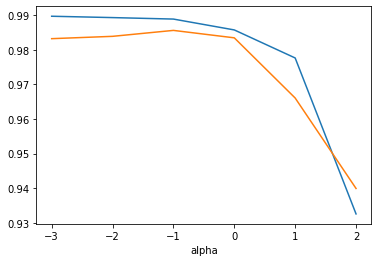

In [27]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')